<a href="https://colab.research.google.com/github/ydv-kunal/-Wine-Quality-Prediction-using-Machine-Learning/blob/main/wine_Quality_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the required Library**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_excel('/content/winequality-red.xls')

Visualization of top 10 reports

In [12]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Classes of target value- quality

In [13]:
set(data.quality)

{3, 4, 5, 6, 7, 8}

Description of the given data set

In [14]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**To check the missing value**

In [15]:
data.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Correlation matrix Among all features

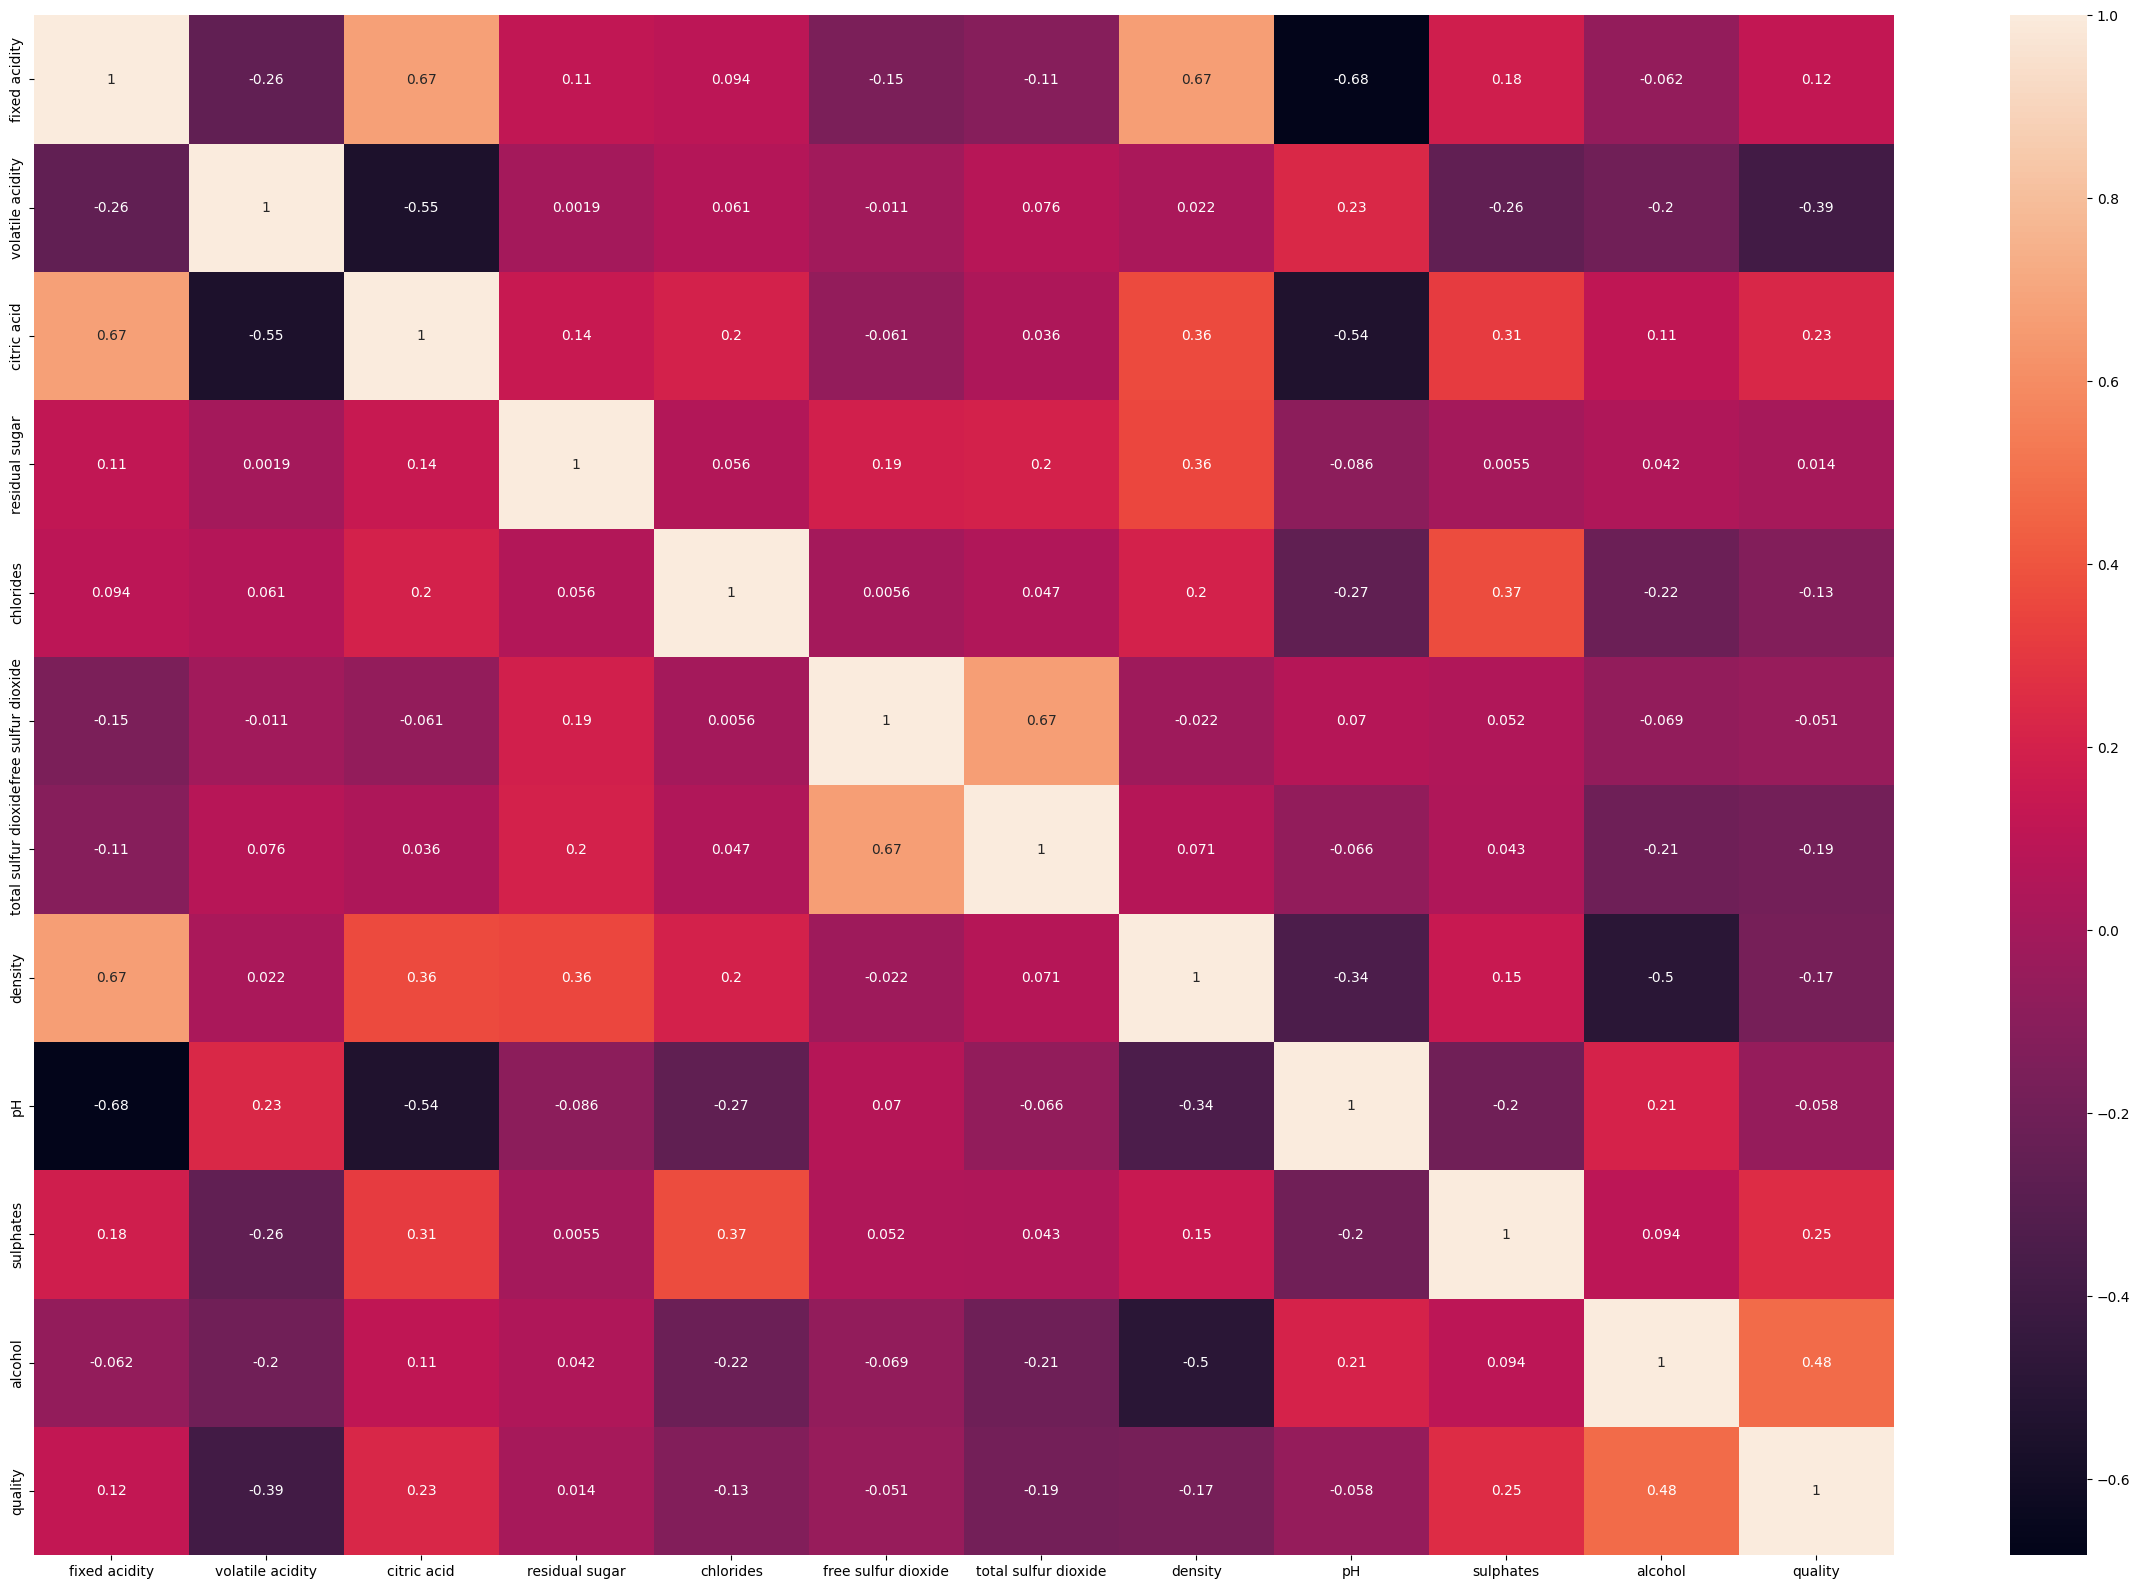

In [16]:
plt.figure(figsize =(30, 20))
corr = data.corr()
sns.heatmap(corr, annot = True)
plt.savefig("Coorelation Matrix.png")
plt.show()

**Detection of outliers using z-score**

In [17]:
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)

[[0.52835961 0.96187667 1.39147228 ... 0.57920652 0.96024611 0.78782264]
 [0.29854743 1.96744245 1.39147228 ... 0.1289504  0.58477711 0.78782264]
 [0.29854743 1.29706527 1.18607043 ... 0.04808883 0.58477711 0.78782264]
 ...
 [1.1603431  0.09955388 0.72391627 ... 0.54204194 0.54162988 0.45084835]
 [1.39015528 0.65462046 0.77526673 ... 0.30598963 0.20930812 0.78782264]
 [1.33270223 1.21684919 1.02199944 ... 0.01092425 0.54162988 0.45084835]]


**z > 3(threshold) -> this is an outlier**

In [18]:
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

remove records whoes z > 3 (oulier)

In [20]:
new_data = data[(z < 3).all(axis = 1)]

In [21]:
new_data.shape

(1451, 12)

In [22]:
data.shape

(1599, 12)

data splitting into features (X) and target column (Y)

In [39]:
from sklearn.model_selection import train_test_split
## X- input feature
x = new_data.drop(columns = 'quality')
## Y - outcome
y = (new_data['quality'] >= 7).astype(int)

In [40]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [41]:
y

,quality
0,0
1,0
2,0
3,0
4,0
...,...
1594,0
1595,0
1596,0
1597,0


In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

**Data modeling using random forest classifier**

In [54]:
# from sklearn.ensemble import RandomForestClassifier
# rf_classificationModel = RandomForestClassifier(n_estimators= 100)

from sklearn.ensemble import RandomForestClassifier
rf_classificationModel = RandomForestClassifier(
    n_estimators=300,      # keep enough trees
    max_depth=10,          # limit depth (try 8–15)
    min_samples_split=5,   # require more samples to split
    min_samples_leaf=4,    # require more samples per leaf
    max_features='sqrt',   # reduce feature randomness
    class_weight='balanced',
    random_state=42
)

In [55]:
rf_classificationModel.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=300, random_state=42)

Prediction of data using random forest model

In [56]:
y_pred = rf_classificationModel.predict(x_test)

In [57]:
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

**Data evaluation on metrics**

In [59]:
from sklearn import metrics
print('Accuracy Score: ', metrics.accuracy_score(y_test, y_pred))

Accuracy Score:  0.9003436426116839


# ***Earlier Accuracy Score: 68%***
# ***Current Accuracy Score: 90%***

earlier y = new_data['quality']

now y = y = (new_data['quality'] >= 7).astype(int)

Hyperparameter tuning can be used to improve accuracy


In [60]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[232  14]
 [ 15  30]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       246
           1       0.68      0.67      0.67        45

    accuracy                           0.90       291
   macro avg       0.81      0.80      0.81       291
weighted avg       0.90      0.90      0.90       291



In [61]:
from sklearn.metrics import accuracy_score

y_train_pred = rf_classificationModel.predict(x_train)
y_test_pred  = rf_classificationModel.predict(x_test)

print("Train Accuracy :", accuracy_score(y_train, y_train_pred))
print("Test Accuracy  :", accuracy_score(y_test, y_test_pred))


Train Accuracy : 0.9629310344827586
Test Accuracy  : 0.9003436426116839


[Text(0.5317796610169492, 0.9545454545454546, 'x[9] <= 0.625\ngini = 0.499\nsamples = 740\nvalue = [574.801, 613.462]'),
 Text(0.2860169491525424, 0.8636363636363636, 'x[4] <= 0.073\ngini = 0.352\nsamples = 376\nvalue = [315.418, 92.949]'),
 Text(0.4088983050847458, 0.9090909090909092, 'True  '),
 Text(0.1652542372881356, 0.7727272727272727, 'x[1] <= 0.415\ngini = 0.492\nsamples = 103\nvalue = [76.833, 59.487]'),
 Text(0.0847457627118644, 0.6818181818181818, 'x[5] <= 13.5\ngini = 0.412\nsamples = 26\nvalue = [16.753, 40.897]'),
 Text(0.06779661016949153, 0.5909090909090909, 'x[6] <= 16.0\ngini = 0.323\nsamples = 19\nvalue = [10.398, 40.897]'),
 Text(0.03389830508474576, 0.5, 'x[9] <= 0.545\ngini = 0.233\nsamples = 10\nvalue = [5.777, 37.179]'),
 Text(0.01694915254237288, 0.4090909090909091, 'gini = 0.473\nsamples = 4\nvalue = [4.622, 7.436]'),
 Text(0.05084745762711865, 0.4090909090909091, 'gini = 0.072\nsamples = 6\nvalue = [1.155, 29.744]'),
 Text(0.1016949152542373, 0.5, 'x[3] <= 1.

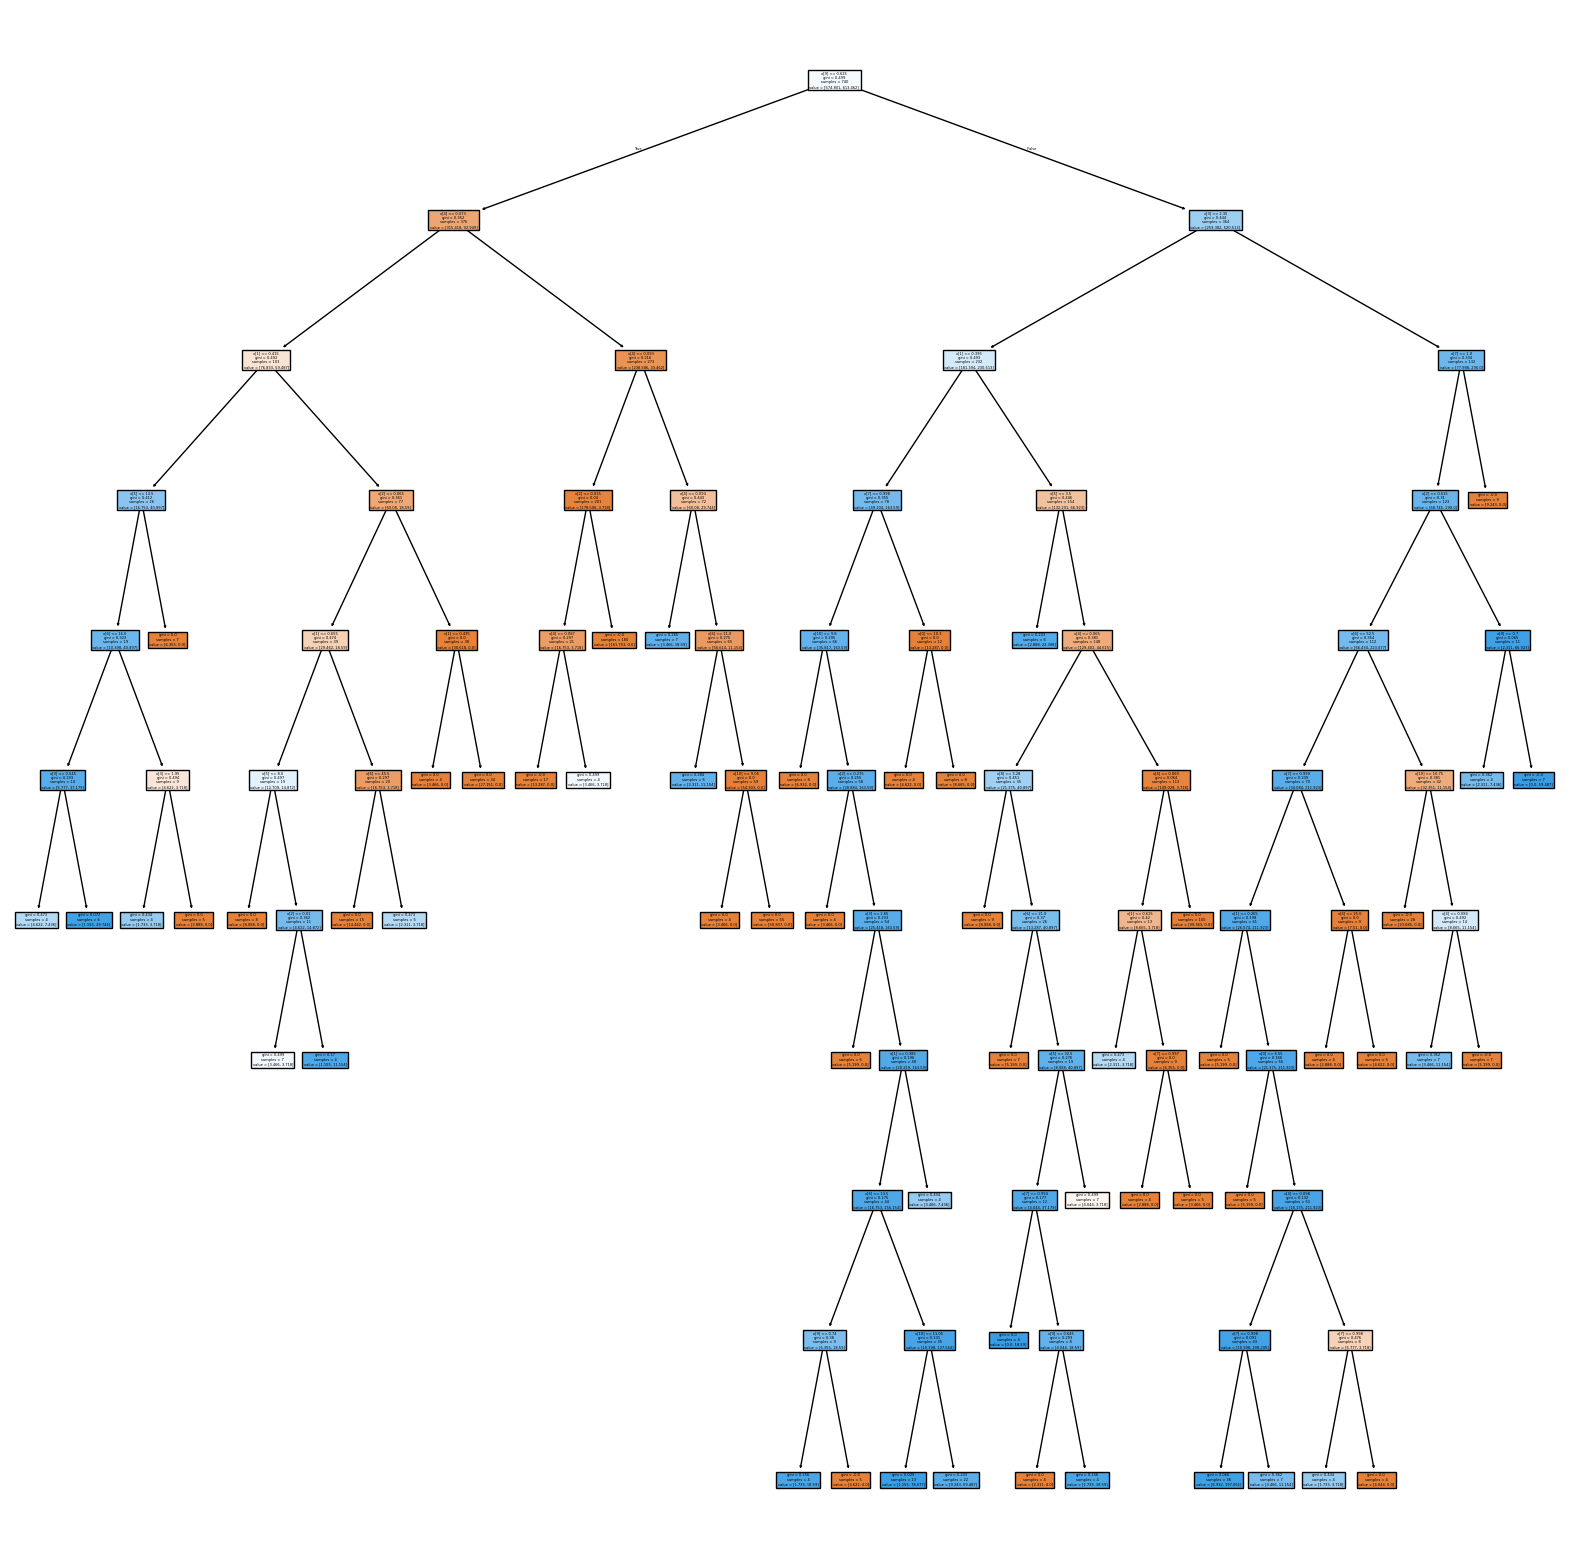

In [62]:
plt.figure(figsize=(20, 20))
from sklearn import tree
tree.plot_tree(rf_classificationModel.estimators_[0], filled = True)

In [63]:
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)

y_pred_log = log_reg.predict(x_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.845360824742268
[[234  12]
 [ 33  12]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       246
           1       0.50      0.27      0.35        45

    accuracy                           0.85       291
   macro avg       0.69      0.61      0.63       291
weighted avg       0.82      0.85      0.82       291



# **With Logistic Regression Accuracy: 85%**

In [64]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9106529209621993
[[240   6]
 [ 20  25]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       246
           1       0.81      0.56      0.66        45

    accuracy                           0.91       291
   macro avg       0.86      0.77      0.80       291
weighted avg       0.91      0.91      0.90       291



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [17:05:21] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# **With XGBoost Accuracy: 91% (more than Random forest )**